In [13]:
import pickle
import numpy as np
from pathlib import Path
import cv2
import torch
import pandas as pd
import json

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/student03/miniconda3/envs/perspective/lib/python3.12/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['annotations']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [17]:
# DATA_PATH = Path('/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datasets/real-test')
DATA_PATH = Path('/home/student03/work/datasets/demo_perspective_dataset')
WORK_DIR = Path('../../work_dir')
OUT_DIR = Path('../../out_dir')

exp_name = '001'

In [18]:
annotations = pd.read_csv(DATA_PATH / 'annotations_demo.csv')
annotations.shape

(420, 7)

In [19]:
annotations

,filename,filepath,width,height,coords,visibility,dataset
0,0000.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.18447405292141822, 0.0], [0.68566691490911...","[1, 1, 1, 1]",perspective_demo
1,0001.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.14552396343600366, 0.4558003670984052], [0...","[1, 1, 1, 1]",perspective_demo
2,0002.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.02116312519196541, 0.19820268648654668], [...","[1, 1, 1, 1]",perspective_demo
3,0003.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.46944932014711444, 0.08534478903326577], [...","[1, 1, 1, 1]",perspective_demo
4,0004.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.21527471849995275, 0.21882354236039958], [...","[1, 1, 1, 1]",perspective_demo
...,...,...,...,...,...,...,...
415,0415.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.11651052967194588, 0.07841297021867204], [...","[1, 1, 1, 1]",perspective_demo
416,0416.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.32274332354145663, 0.08651730135688591], [...","[1, 1, 1, 1]",perspective_demo
417,0417.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.3789056654899351, 0.40427777704305506], [0...","[1, 1, 1, 1]",perspective_demo
418,0418.jpg,/home/student03/work/Max/demo_perspective_data...,1984,2806,"[[0.03004475562803207, 0.08916193336057221], [...","[1, 1, 1, 1]",perspective_demo


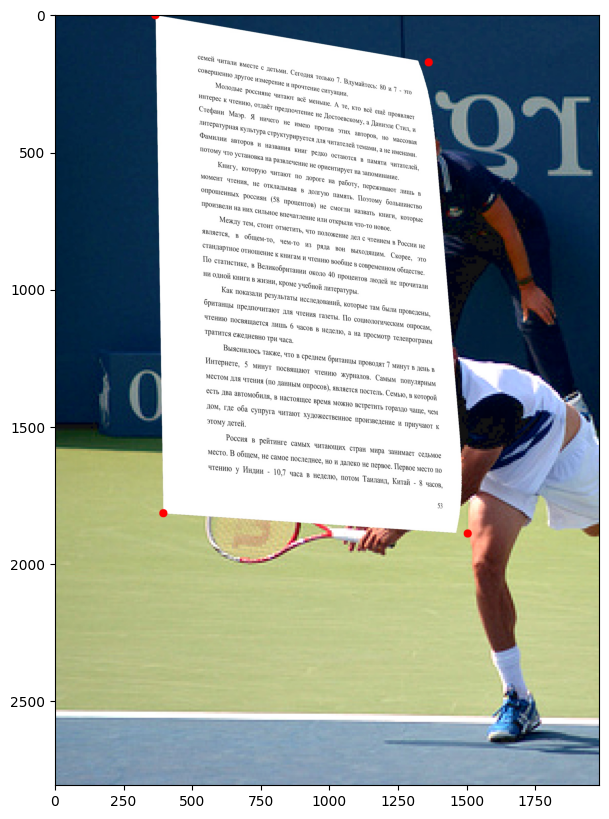

In [21]:
idx = 0
filepath = annotations['filepath'].iloc[idx]
image = cv2.imread(filepath)
height, width = image.shape[:2]
coords = json.loads(annotations['coords'].iloc[idx])

for coord in coords:
    x, y = int(coord[0] * width), int(coord[1] * height) 
    cv2.circle(image, (x, y), 15, (0,0,255), -1)

plt.figure(figsize=(10, 10))
plt.imshow(image[:,:,::-1])

In [12]:
coords

'[[0.18447405292141822, 0.0], [0.6856669149091167, 0.06152368764408299], [0.7573354782596711, 0.6734236311419726], [0.19881499198175245, 0.6470076329183001]]'

### Train/Test samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..255.0].


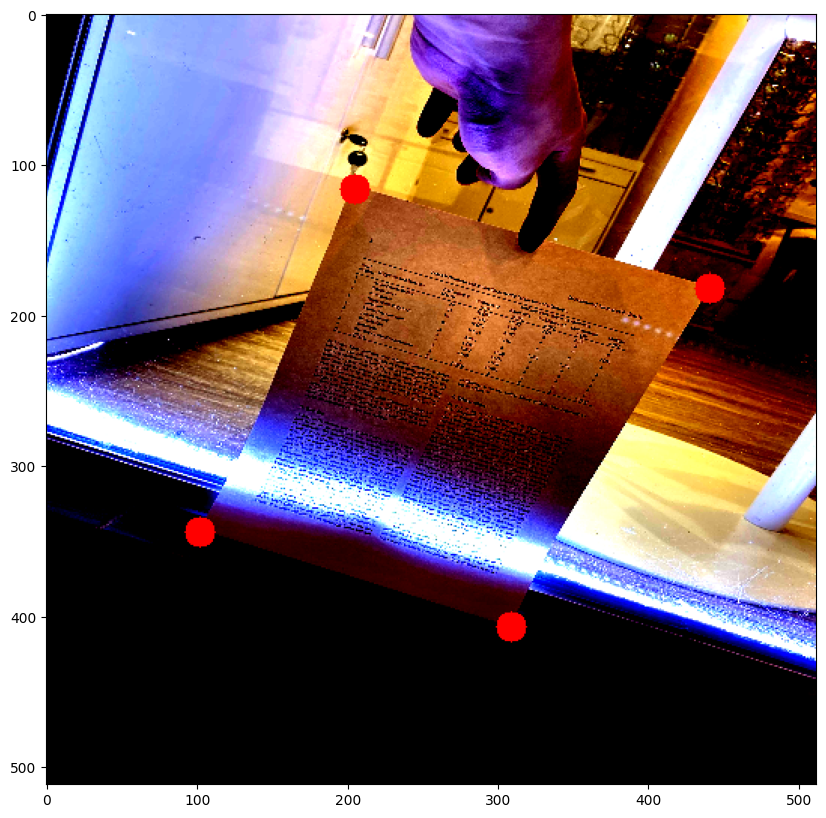

In [40]:
with open(WORK_DIR / 'sample.pkl', 'rb') as f:
    sample = pickle.load(f)

images, image_path, im_size, coords = sample

idx = 1
image = images[idx].cpu().numpy().transpose(1, 2, 0)
height, width = image.shape[:2]

coord = coords[idx].reshape(4, 2).cpu().numpy()

for c in coord:
    x, y = int(round(c[0] * width)), int(round(c[1] * height))
    cv2.circle(image, (x, y), 10, (0,0,255), -1)

plt.figure(figsize=(10, 10))
plt.imshow(image[:, :, ::-1])
plt.show();

In [25]:
coord

array([[0.18220899, 0.24057542],
       [0.7205688 , 0.20659724],
       [0.23412697, 0.88169646],
       [0.9335317 , 0.795883  ]], dtype=float32)

In [26]:
image.min(), image.max()

(np.float32(-2.117904), np.float32(255.0))

### Result

In [56]:
OUT_DIR = Path('/home/bulat/Work/Sirius/DeWrapDoc-12.25/out_dir/dewrap/003')
result_df = pd.read_csv(OUT_DIR / 'results.csv')
result_df.sample(10)

,filepath,height_orig,width_orig,height_infer,width_infer,x1,y1,x2,y2,x3,y3,x4,y4
33,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,4032,3024,512,512,0.317703,0.332067,0.607720,0.259033,0.457812,0.636873,0.666493,0.846941
6,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,2048,1536,512,512,0.294736,0.255263,0.618685,0.207004,0.328355,0.769732,0.682111,0.809867
20,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,2048,1536,512,512,0.107647,0.626353,0.466180,0.263876,0.777410,0.412130,0.680109,0.629564
32,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,2048,1536,512,512,0.174532,0.405849,0.440269,0.101174,0.744803,0.787472,0.747603,0.669327
28,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,2048,1536,512,512,0.239576,0.204122,0.757724,0.232885,0.212075,0.818655,0.731702,0.851664
19,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,4032,3024,512,512,0.173334,0.246628,0.869951,0.222619,0.224956,0.821630,0.831040,0.868451
4,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,2048,1536,512,512,0.333004,0.190748,0.568485,0.190114,0.295225,0.896550,0.660863,0.716020
18,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,2048,1536,512,512,0.073437,0.466399,0.454969,0.244127,0.585279,0.731058,0.904014,0.596738
9,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,4032,3024,512,512,0.163666,0.223940,0.657533,0.232568,0.298152,0.814135,0.872144,0.742789
13,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,4032,3024,512,512,0.241079,0.196634,0.826003,0.213873,0.130094,0.827358,0.819560,0.840862


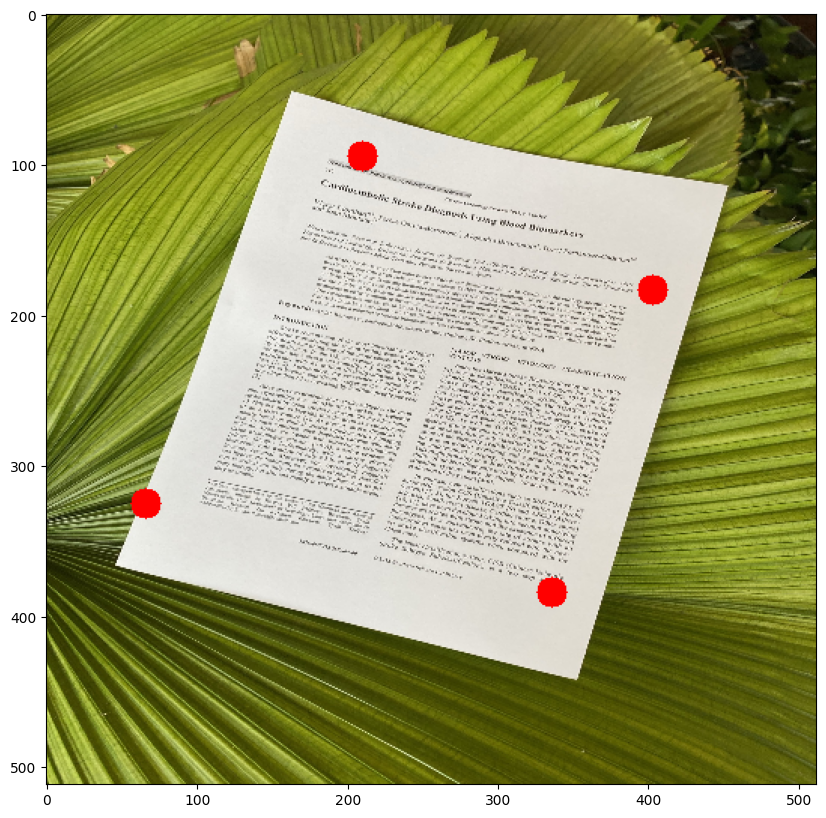

In [59]:
idx = 2
filepath = result_df['filepath'].iloc[idx]
image = cv2.imread(filepath, cv2.COLOR_BGR2RGB)
height_orig, width_orig, height_infer, width_infer = result_df[['height_orig', 'width_orig', 'height_infer', 'width_infer']].iloc[idx].values

coords = result_df[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']].iloc[idx].values.reshape(4, 2)

img = cv2.resize(image, (width_infer, height_infer))

for c in coords:
    x, y = int(round(c[0] * width_infer)), int(round(c[1] * height_infer))
    # x, y = int(round(c[0] * width_orig)), int(round(c[1] * height_orig))
    cv2.circle(img, (x, y), 10, (0,0,255), -1)

plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])
plt.show()

In [55]:
coords[:, 0] * width_orig

array([ 375.44627712,  487.941888  , 1232.0726016 , 1025.67745536])

In [56]:
coords[:, 0] * height_orig

array([ 500.59503616,  650.589184  , 1642.7634688 , 1367.56994048])